In [1]:
import csv
import numpy as np
import numpy.matlib
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Part A - 2D Histogram
data = pd.read_csv('n90pol.csv').to_numpy()
y = data[:,2]
data = data[:,0:2]
print(y[0:5])
print(data[0:3,:])

[2. 3. 3. 2. 5.]
[[ 0.0051 -0.0286]
 [-0.0674  0.0007]
 [-0.0257 -0.011 ]]


In [3]:
ndata = preprocessing.scale(data)
m, n = ndata.shape

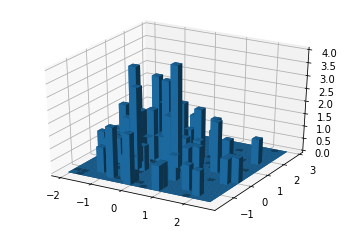

In [4]:
min_data = ndata.min(0)
max_data = ndata.max(0)
nbin = 20
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(ndata[:,0], ndata[:,1], bins=nbin)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz )

In [5]:
# Part B - KDE 2D Contour Plot
xx = ndata[:,0]
yy = ndata[:,1]

deltaX = (max(xx) - min(xx))/10
deltaY = (max(yy) - min(yy))/10
xmin = min(xx) - deltaX
xmax = max(xx) + deltaX
ymin = min(yy) - deltaY
ymax = max(yy) + deltaY

X, Y = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]
positions = np.vstack([X.ravel(), Y.ravel()]).T

In [6]:
h_silverman = 1.06*np.std(ndata)*m**(-.2) # Silverman's Rule of Thumb
h_silverman

h = h_silverman
p = np.zeros((50,50))
for i in range(0,len(ndata)):
    K = np.zeros((50,50))
    u = (ndata[i]-positions)/h
    K = np.reshape((1/h)*(1/np.sqrt(2*np.pi))*np.exp(-(u[:,0]**2 + u[:,1]**2)/2),X.shape)
    p = np.add(p,K)
p = p/m

Text(0.5, 1.0, '2D Gaussian KDE Contour Plot')

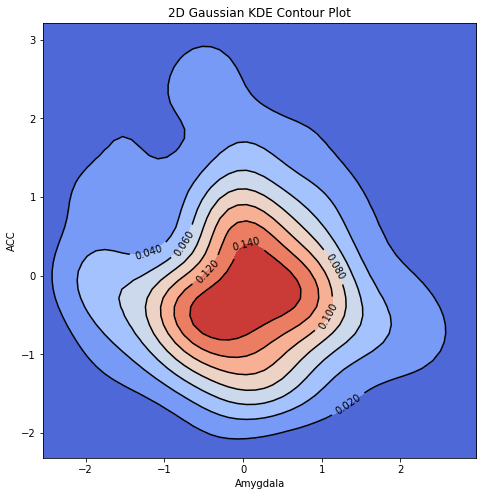

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(X, Y, p, cmap='coolwarm')
ax.imshow(np.rot90(p), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(X, Y, p, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Amygdala')
ax.set_ylabel('ACC')
plt.title('2D Gaussian KDE Contour Plot')

Text(0.5, 0.92, '3D Gaussian KDE')

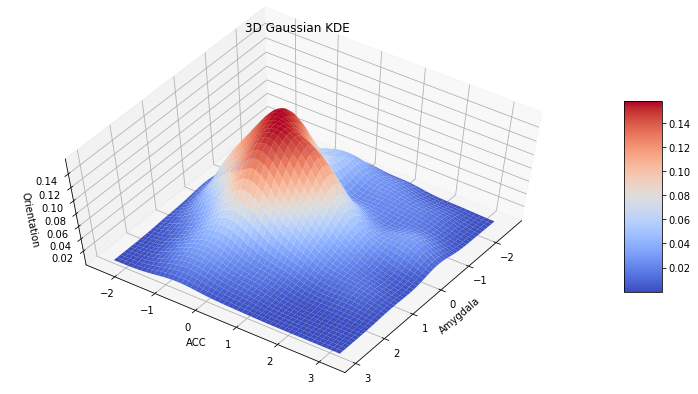

In [8]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, p, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
ax.set_xlabel('Amygdala')
ax.set_ylabel('ACC')
ax.set_zlabel('Orientation')
plt.title('3D Gaussian KDE')

In [9]:
# Part C - Conditional Distributions
print(ndata[np.where(y == 1),0][0]) # There are no points with Orientation == 1
print(ndata[np.where(y == 2),0][0])

[]
[ 0.15725797  1.5543831   2.17429955  0.50576821 -0.33620787  0.08940641
  0.33613933  0.04005983 -0.71555972  1.5944772  -0.37938613  0.53660982
  2.08485887]


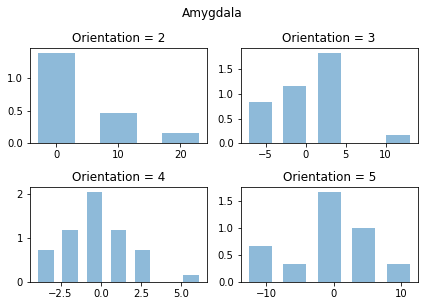

In [10]:
plt.figure()
plt.suptitle("Amygdala",y=1.05)
for j in range(2,6):
    amyg = ndata[np.where(y == j),0][0] / (len(ndata[np.where(y == j),0][0])/len(ndata))
    m = len(amyg)
    min_data = min(amyg)
    max_data = max(amyg)
    bw = 2 * stats.iqr(amyg) / len(amyg)**(1/3)
    nbin = int(round((max_data - min_data) / bw))
    sbin = (max_data - min_data) / nbin
    boundary = np.arange(min_data-0.001, max_data,sbin)
    myhist = np.zeros(nbin+1)
    for i in range(m):
        whichbin = np.max(np.where(amyg[i] > boundary))
        myhist[whichbin] = myhist[whichbin] + 1
    myhist = np.divide(np.dot(myhist, nbin), m)
    plt.subplot(2,2,j-1)
    plt.gca().set_title("Orientation = "+str(j))
    plt.bar(boundary + 0.5 * sbin, myhist, align='center', alpha=0.5, width = bw/1.5)
    plt.tight_layout()

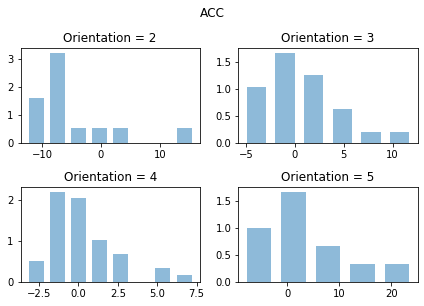

In [11]:
plt.figure()
plt.suptitle("ACC",y=1.05)
for j in range(2,6):
    acc = ndata[np.where(y == j),1][0] / (len(ndata[np.where(y == j),0][0])/len(ndata))
    m = len(acc)
    min_data = min(acc)
    max_data = max(acc)
    bw = 2 * stats.iqr(acc) / len(acc)**(1/3)
    nbin = int(round((max_data - min_data) / bw))
    sbin = (max_data - min_data) / nbin
    boundary = np.arange(min_data-0.001, max_data,sbin)
    myhist = np.zeros(nbin+1)
    for i in range(m):
        whichbin = np.max(np.where(acc[i] > boundary))
        myhist[whichbin] = myhist[whichbin] + 1
    myhist = np.divide(np.dot(myhist, nbin), m)
    plt.subplot(2,2,j-1)
    plt.gca().set_title("Orientation = "+str(j))
    plt.bar(boundary + 0.5 * sbin, myhist, align='center', alpha=0.5, width = bw/1.5)
    plt.tight_layout()